# > **Tip**: Welcome to the Investigate a Dataset project! 

# Project: Investigate a Dataset (MEDICAL APPOINTED NO SHOWS)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [59]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
# import the requird modules
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

## GATHERING DATA

In [60]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# Import data from "URL"
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv"
df = pd.read_csv(url)

# ASSESSING DATA 

In [61]:
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [62]:
#Information about every columns's datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [63]:
#columns names
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [64]:

#IS THERE DUPLICATED ROW
df.duplicated().sum()


0

In [65]:
#Number of NaN VALUES OF each columns
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [66]:
#Generate descriptive statistics
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [67]:
df[df["Age"]<0]

PatientId  AppointmentID Gender          ScheduledDay  \
99832  4.659432e+14        5775010      F  2016-06-06T08:58:13Z   

             AppointmentDay  Age Neighbourhood  Scholarship  Hipertension  \
99832  2016-06-06T00:00:00Z   -1         ROMÃO            0             0   

       Diabetes  Alcoholism  Handcap  SMS_received No-show  
99832         0           0        0             0      No

# > **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 

# CLEANINAG DATA

In [68]:
#Taking a copy of dataset to perform the cleaning process without  changing the real data
df_clean = df.copy()
df_clean

PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
5       9.598513e+13        5626772      F  2016-04-27T08:36:51Z   
6       7.336882e+14        5630279      F  2016-04-27T15:05:12Z   
7       3.449833e+12        5630575      F  2016-04-27T15:39:58Z   
8       5.639473e+13        5638447      F  2016-04-29T08:02:16Z   
9       7.812456e+13        5629123      F  2016-04-27T12:48:25Z   
10      7.345362e+14        5630213      F  2016-04-27T14:58:11Z   
11      7.542951e+12        5620163      M  2016-04-26T08:44:12Z   
12      5.666548e+14        5634718      F  2016-04-28T11:33:51Z   
13      9.113946e+14        5636249      M  2016-04-28T14:52:07Z   
14      9.988472e+13        5633951      F  2016-04-28T10:06:24Z   
15      9.994839e+10        5620206      F  2016-04-26T08:47:27Z   
16      8.457439e+13        5633121      M  2016-04-28T08:51:47Z   
17      1.479497e+13        5633460      F  2016-04-28T09:28:57Z   
18      1.713538e+13        5621836      F  2016-04-26T10:54:18Z   
19      7.223289e+12        5640433      F  2016-04-29T10:43:14Z   
20      6.222575e+14        5626083      F  2016-04-27T07:51:14Z   
21      1.215484e+13        5628338      F  2016-04-27T10:50:45Z   
22      8.632298e+14        5616091      M  2016-04-25T13:29:16Z   
23      2.137540e+14        5634142      F  2016-04-28T10:27:05Z   
24      8.734858e+12        5641780      F  2016-04-29T14:19:19Z   
25      5.819370e+12        5624020      M  2016-04-26T15:04:17Z   
26      2.578785e+10        5641781      F  2016-04-29T14:19:42Z   
27      1.215484e+13        5628345      F  2016-04-27T10:51:45Z   
28      5.926172e+12        5642400      M  2016-04-29T15:48:02Z   
29      1.225776e+12        5642186      F  2016-04-29T15:16:29Z   
...              ...            ...    ...                   ...   
110497  7.935892e+14        5757745      M  2016-06-01T09:46:33Z   
110498  9.433654e+13        5787655      F  2016-06-08T10:21:14Z   
110499  8.219692e+14        5757697      F  2016-06-01T09:42:56Z   
110500  4.434384e+14        5787233      F  2016-06-08T09:35:13Z   
110501  4.544252e+11        5758133      M  2016-06-01T10:19:12Z   
110502  7.316229e+14        5787937      F  2016-06-08T10:50:42Z   
110503  2.362182e+13        5759473      F  2016-06-01T13:00:36Z   
110504  9.947983e+12        5788052      F  2016-06-08T11:06:21Z   
110505  5.667344e+13        5758455      F  2016-06-01T10:45:50Z   
110506  8.973883e+11        5758779      M  2016-06-01T11:09:20Z   
110507  4.769462e+14        5786918      F  2016-06-08T09:04:18Z   
110508  9.433654e+13        5757656      F  2016-06-01T09:41:00Z   
110509  4.952968e+14        5786750      M  2016-06-08T08:50:51Z   
110510  2.362182e+13        5757587      F  2016-06-01T09:35:48Z   
110511  8.235996e+11        5786742      F  2016-06-08T08:50:20Z   
110512  9.876246e+13        5786368      F  2016-06-08T08:20:01Z   
110513  8.674778e+13        5785964      M  2016-06-08T07:52:55Z   
110514  2.695685e+12        5786567      F  2016-06-08T08:35:31Z   
110515  6.456342e+14        5778621      M  2016-06-06T15:58:05Z   
110516  6.923772e+13        5780205      F  2016-06-07T07:45:16Z   
110517  5.574942e+12        5780122      F  2016-06-07T07:38:34Z   
110518  7.263315e+13        5630375      F  2016-04-27T15:15:06Z   
110519  6.542388e+13        5630447      F  2016-04-27T15:23:14Z   
110520  9.969977e+14        5650534      F  2016-05-03T07:51:47Z   
110521  3.635534e+13        5651072      F  2016-05-03T08:23:40Z   
110522  2.572134e+12        5651768      F  2016-05-03T09:15:35Z   
110523  3.596266e+12        5650093      F  2016-05-03T07:27:33Z   

##### for data cleaning 
#(1) I rename last coulmn to more clear name
#(2) convert type of coulmns to suitable datatype
#(3) there is mistake or error in Age = -1 so I CHANGE IT TO 1   
#(4) last column Attend appointent , I replace "No" insted of  " no no show up" to "1 " and "Yes" to "0"
#(5) I drop patientId and APPOINTMENTID because i donot need in analysis

In [69]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [70]:
# (1)name of last coulmn "No-show" convert to "ATTEND APPOINTMENT" TO be more clear
df_clean.rename(columns={"No-show":"Attend_Appointment"},inplace = True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId             110527 non-null float64
AppointmentID         110527 non-null int64
Gender                110527 non-null object
ScheduledDay          110527 non-null object
AppointmentDay        110527 non-null object
Age                   110527 non-null int64
Neighbourhood         110527 non-null object
Scholarship           110527 non-null int64
Hipertension          110527 non-null int64
Diabetes              110527 non-null int64
Alcoholism            110527 non-null int64
Handcap               110527 non-null int64
SMS_received          110527 non-null int64
Attend_Appointment    110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [71]:
# (2)convert "ScheduledDay"and"AppointmentDay" to datetime

In [72]:
df_clean["ScheduledDay"] = pd.to_datetime(df_clean["ScheduledDay"])


df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId             110527 non-null float64
AppointmentID         110527 non-null int64
Gender                110527 non-null object
ScheduledDay          110527 non-null datetime64[ns]
AppointmentDay        110527 non-null object
Age                   110527 non-null int64
Neighbourhood         110527 non-null object
Scholarship           110527 non-null int64
Hipertension          110527 non-null int64
Diabetes              110527 non-null int64
Alcoholism            110527 non-null int64
Handcap               110527 non-null int64
SMS_received          110527 non-null int64
Attend_Appointment    110527 non-null object
dtypes: datetime64[ns](1), float64(1), int64(8), object(4)
memory usage: 11.8+ MB


In [73]:
df_clean["AppointmentDay"] = pd.to_datetime(df_clean["AppointmentDay"])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId             110527 non-null float64
AppointmentID         110527 non-null int64
Gender                110527 non-null object
ScheduledDay          110527 non-null datetime64[ns]
AppointmentDay        110527 non-null datetime64[ns]
Age                   110527 non-null int64
Neighbourhood         110527 non-null object
Scholarship           110527 non-null int64
Hipertension          110527 non-null int64
Diabetes              110527 non-null int64
Alcoholism            110527 non-null int64
Handcap               110527 non-null int64
SMS_received          110527 non-null int64
Attend_Appointment    110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [74]:
#(3) I chage age from -1 to 1

df_clean.loc[(df.Age==-1),"Age"]=1

In [75]:

df_clean[df_clean.Age==-1]


Empty DataFrame
Columns: [PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, Attend_Appointment]
Index: []

In [76]:
#(4) I change last column "Yes" to "0" and "No" to "1"
df_clean["Attend_Appointment"] = df_clean["Attend_Appointment"].replace(["Yes"],"0")
#df_clean["Attend_Appointment"].value_counts()

In [77]:
df_clean["Attend_Appointment"] = df_clean["Attend_Appointment"].replace ( ["No"],"1")

In [78]:
df_clean

PatientId  AppointmentID Gender        ScheduledDay AppointmentDay  \
0       2.987250e+13        5642903      F 2016-04-29 18:38:08     2016-04-29   
1       5.589978e+14        5642503      M 2016-04-29 16:08:27     2016-04-29   
2       4.262962e+12        5642549      F 2016-04-29 16:19:04     2016-04-29   
3       8.679512e+11        5642828      F 2016-04-29 17:29:31     2016-04-29   
4       8.841186e+12        5642494      F 2016-04-29 16:07:23     2016-04-29   
5       9.598513e+13        5626772      F 2016-04-27 08:36:51     2016-04-29   
6       7.336882e+14        5630279      F 2016-04-27 15:05:12     2016-04-29   
7       3.449833e+12        5630575      F 2016-04-27 15:39:58     2016-04-29   
8       5.639473e+13        5638447      F 2016-04-29 08:02:16     2016-04-29   
9       7.812456e+13        5629123      F 2016-04-27 12:48:25     2016-04-29   
10      7.345362e+14        5630213      F 2016-04-27 14:58:11     2016-04-29   
11      7.542951e+12        5620163      M 2016-04-26 08:44:12     2016-04-29   
12      5.666548e+14        5634718      F 2016-04-28 11:33:51     2016-04-29   
13      9.113946e+14        5636249      M 2016-04-28 14:52:07     2016-04-29   
14      9.988472e+13        5633951      F 2016-04-28 10:06:24     2016-04-29   
15      9.994839e+10        5620206      F 2016-04-26 08:47:27     2016-04-29   
16      8.457439e+13        5633121      M 2016-04-28 08:51:47     2016-04-29   
17      1.479497e+13        5633460      F 2016-04-28 09:28:57     2016-04-29   
18      1.713538e+13        5621836      F 2016-04-26 10:54:18     2016-04-29   
19      7.223289e+12        5640433      F 2016-04-29 10:43:14     2016-04-29   
20      6.222575e+14        5626083      F 2016-04-27 07:51:14     2016-04-29   
21      1.215484e+13        5628338      F 2016-04-27 10:50:45     2016-04-29   
22      8.632298e+14        5616091      M 2016-04-25 13:29:16     2016-04-29   
23      2.137540e+14        5634142      F 2016-04-28 10:27:05     2016-04-29   
24      8.734858e+12        5641780      F 2016-04-29 14:19:19     2016-04-29   
25      5.819370e+12        5624020      M 2016-04-26 15:04:17     2016-04-29   
26      2.578785e+10        5641781      F 2016-04-29 14:19:42     2016-04-29   
27      1.215484e+13        5628345      F 2016-04-27 10:51:45     2016-04-29   
28      5.926172e+12        5642400      M 2016-04-29 15:48:02     2016-04-29   
29      1.225776e+12        5642186      F 2016-04-29 15:16:29     2016-04-29   
...              ...            ...    ...                 ...            ...   
110497  7.935892e+14        5757745      M 2016-06-01 09:46:33     2016-06-01   
110498  9.433654e+13        5787655      F 2016-06-08 10:21:14     2016-06-08   
110499  8.219692e+14        5757697      F 2016-06-01 09:42:56     2016-06-01   
110500  4.434384e+14        5787233      F 2016-06-08 09:35:13     2016-06-08   
110501  4.544252e+11        5758133      M 2016-06-01 10:19:12     2016-06-01   
110502  7.316229e+14        5787937      F 2016-06-08 10:50:42     2016-06-08   
110503  2.362182e+13        5759473      F 2016-06-01 13:00:36     2016-06-01   
110504  9.947983e+12        5788052      F 2016-06-08 11:06:21     2016-06-08   
110505  5.667344e+13        5758455      F 2016-06-01 10:45:50     2016-06-01   
110506  8.973883e+11        5758779      M 2016-06-01 11:09:20     2016-06-01   
110507  4.769462e+14        5786918      F 2016-06-08 09:04:18     2016-06-08   
110508  9.433654e+13        5757656      F 2016-06-01 09:41:00     2016-06-01   
110509  4.952968e+14        5786750      M 2016-06-08 08:50:51     2016-06-08   
110510  2.362182e+13        5757587      F 2016-06-01 09:35:48     2016-06-01   
110511  8.235996e+11        5786742      F 2016-06-08 08:50:20     2016-06-08   
110512  9.876246e+13        5786368      F 2016-06-08 08:20:01     2016-06-08   
110513  8.674778e+13        5785964      M 2016-06-08 07:52:55     2016-06-08   
110514  2.695685e+12        5786567      F

In [79]:
#(5)drop first and secound coulmna 
df_clean.drop(["PatientId","AppointmentID"],axis=1,inplace=True)

In [80]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender                110527 non-null object
ScheduledDay          110527 non-null datetime64[ns]
AppointmentDay        110527 non-null datetime64[ns]
Age                   110527 non-null int64
Neighbourhood         110527 non-null object
Scholarship           110527 non-null int64
Hipertension          110527 non-null int64
Diabetes              110527 non-null int64
Alcoholism            110527 non-null int64
Handcap               110527 non-null int64
SMS_received          110527 non-null int64
Attend_Appointment    110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


NOW FINALLY WE HAVE CLEAN DATA 100%

# Use this, and more code cells, to explore your data. Don't forget to add

#I SEPRATE DATA IN TWO SEPERATE FRAME ONE FOR ATTENT AND ANOTHER FRAME FOR NOT ATTEND


In [81]:
df_clean_attend = df_clean[df_clean["Attend_Appointment"]=="1"]
df_clean_attend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88208 entries, 0 to 110526
Data columns (total 12 columns):
Gender                88208 non-null object
ScheduledDay          88208 non-null datetime64[ns]
AppointmentDay        88208 non-null datetime64[ns]
Age                   88208 non-null int64
Neighbourhood         88208 non-null object
Scholarship           88208 non-null int64
Hipertension          88208 non-null int64
Diabetes              88208 non-null int64
Alcoholism            88208 non-null int64
Handcap               88208 non-null int64
SMS_received          88208 non-null int64
Attend_Appointment    88208 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 8.7+ MB


In [82]:
df_clean_no_attend = df_clean[df_clean["Attend_Appointment"]=="0"]
df_clean_no_attend

Gender        ScheduledDay AppointmentDay  Age    Neighbourhood  \
6           F 2016-04-27 15:05:12     2016-04-29   23       GOIABEIRAS   
7           F 2016-04-27 15:39:58     2016-04-29   39       GOIABEIRAS   
11          M 2016-04-26 08:44:12     2016-04-29   29   NOVA PALESTINA   
17          F 2016-04-28 09:28:57     2016-04-29   40        CONQUISTA   
20          F 2016-04-27 07:51:14     2016-04-29   30   NOVA PALESTINA   
21          F 2016-04-27 10:50:45     2016-04-29    4        CONQUISTA   
22          M 2016-04-25 13:29:16     2016-04-29   13        CONQUISTA   
31          M 2016-04-27 12:07:14     2016-04-29   12   NOVA PALESTINA   
44          F 2016-04-28 13:27:27     2016-04-29   78    SÃO CRISTÓVÃO   
48          F 2016-04-26 07:19:49     2016-04-29   58    SÃO CRISTÓVÃO   
49          F 2016-03-31 17:11:17     2016-04-29   27   GRANDE VITÓRIA   
50          F 2016-03-31 17:12:45     2016-04-29   19   GRANDE VITÓRIA   
51          F 2016-03-31 17:05:31     2016-04-29   23   GRANDE VITÓRIA   
52          F 2016-03-31 17:06:17     2016-04-29   23   GRANDE VITÓRIA   
56          M 2016-04-19 09:47:43     2016-04-29   12   NOVA PALESTINA   
61          F 2016-04-27 08:53:09     2016-04-29    2   NOVA PALESTINA   
76          M 2016-04-18 17:40:18     2016-04-29   28  ANTÔNIO HONÓRIO   
79          M 2016-04-18 17:53:25     2016-04-29   67      MARIA ORTIZ   
90          M 2016-04-18 12:33:05     2016-04-29   11      JUCUTUQUARA   
104         F 2016-04-28 08:04:48     2016-04-29    0    SANTO ANTÔNIO   
107         F 2016-04-20 13:30:12     2016-04-29   26    SANTO ANTÔNIO   
116         F 2016-04-12 15:35:30     2016-04-29   18    SANTO ANTÔNIO   
123         F 2016-04-26 10:12:46     2016-04-29   31       BELA VISTA   
126         F 2016-04-28 09:37:22     2016-04-29   67     PRAIA DO SUÁ   
128         F 2016-04-12 09:41:01     2016-04-29   34     PRAIA DO SUÁ   
129         F 2016-04-08 09:28:50     2016-04-29   22     PRAIA DO SUÁ   
131         M 2016-04-28 17:38:06     2016-04-29   29     PRAIA DO SUÁ   
132         M 2016-04-08 09:29:23     2016-04-29    0     PRAIA DO SUÁ   
135         M 2016-04-08 09:30:58     2016-04-29   30     PRAIA DO SUÁ   
136         F 2016-04-15 08:45:32     2016-04-29   33           BONFIM   
...       ...                 ...            ...  ...              ...   
110383      F 2016-04-14 09:37:34     2016-06-01   48      RESISTÊNCIA   
110385      F 2016-04-18 16:18:19     2016-06-08   23      RESISTÊNCIA   
110386      F 2016-04-14 09:37:34     2016-06-01   48      RESISTÊNCIA   
110391      F 2016-05-20 13:41:05     2016-06-06   19      RESISTÊNCIA   
110392      M 2016-05-30 13:43:24     2016-06-07   38      RESISTÊNCIA   
110394      F 2016-04-28 17:29:26     2016-06-07   31      RESISTÊNCIA   
110399      F 2016-05-12 16:47:53     2016-06-07   17      RESISTÊNCIA   
110400      F 2016-05-25 13:29:23     2016-06-07   36      RESISTÊNCIA   
110401      M 2016-04-29 10:51:13     2016-06-07   39      SANTOS REIS   
110402      M 2016-05-09 10:37:11     2016-06-07   38      RESISTÊNCIA   
110405      F 2016-05-24 09:30:36     2016-06-06   33      RESISTÊNCIA   
110415      M 2016-05-04 11:29:17     2016-06-06   59      RESISTÊNCIA   
110420      F 2016-04-12 14:01:07     2016-06-06   41      RESISTÊNCIA   
110428      F 2016-06-03 12:33:46     2016-06-08    8      RESISTÊNCIA   
110429      F 2016-06-07 10:12:25     2016-06-08   44      RESISTÊNCIA   
110430      F 2016-05-25 09:01:33     2016-06-01   57      RESISTÊNCIA   
110431      M 2016-06-03 08:45:25     2016-06-08   12      RESISTÊNCIA   
110432      F 2016-06-03 08:45:57     2016-06-08   34      RESISTÊNCIA   
110442      M 2016-05-16 14:41:52     2016-06-06    8      RESISTÊNCIA   
110449      F 2016-05-31 08:19:23     2016-06-06   12      RESISTÊNCIA   
110461      F 2016-04-27 10:29:36     2016-06-03   13      RESISTÊNCIA   
110469      F 2016-05-04 07:35:31     2016-06-07   51      RESISTÊNCIA   
110470     

# Quetion 1 Is their relation between "receive message" and "attend appointment"?

In [83]:
x = df_clean_attend["SMS_received"].value_counts()[1]# number of patient that receive sms and attend appointment
x

25698

In [84]:
f = df_clean_attend["SMS_received"].value_counts()[0]# number of patient that not receive sms and attend appointments
f

62510

In [85]:
y = df_clean_attend["Attend_Appointment"].value_counts()# total number of patient attend
y

1    88208
Name: Attend_Appointment, dtype: int64

In [86]:
l=round(x/y*100)
print("percentage of patient that receive SMS",l)


percentage of patient that receive SMS 1    29.0
Name: Attend_Appointment, dtype: float64


In [87]:
m = round(f/y*100)
print("percentage of patient that not receive SMS",m)

percentage of patient that not receive SMS 1    71.0
Name: Attend_Appointment, dtype: float64


Text(0.5,1,'Relation between [number of patient attend] and [receive massage or not]')

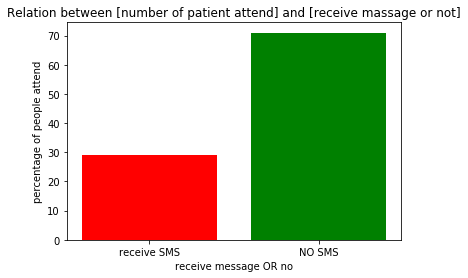

In [88]:

left = [1,2]
height = [29,71]
tick_label = ["receive SMS","NO SMS"]
plt.bar(left,height,tick_label = tick_label,width = 0.8,color = ["red","green"])
plt.xlabel("receive message OR no")
plt.ylabel("percentage of people attend")
plt.title("Relation between [number of patient attend] and [receive massage or not]")

# its clear that no relation between SMS AND PATIENT ATTEND

# # Q2: IS RELATION BETWEEN GENDER AND ATTEND APPOINTMENT?

In [89]:
G = df_clean_attend["Gender"].value_counts()

In [90]:
female = G[0]
Male = G[1]
female,Male

(57246, 30962)

In [91]:
left=[1,2]
height=[57246,30962]
tick_label=["female","male"]
plt.bar(left,height,tick_label=tick_label,width = 0.8,color=["yellow","black"])
plt.xlabel("GENDER")
plt.ylabel("number of patient attend")
plt.title("relation between gender and attend")

Text(0.5,1,'relation between gender and attend')

# it is clear that female attend more than male

Text(0,0.5,'count of attend patient')

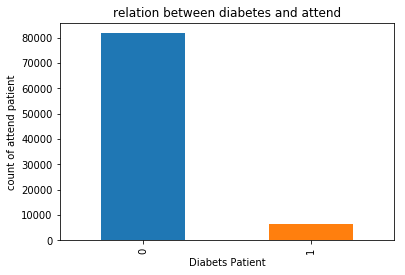

In [92]:
df_clean_attend["Diabetes"].value_counts().plot(kind='bar',title='relation between diabetes and attend')
plt.xlabel("Diabets Patient")
plt.ylabel("count of attend patient")

# it is clear that normal patient attend appointment more than diabetes patient

# Q3: WHAT IS NEIGHBOURHOOD THAT INCLUDE MORE PATIENT ATTRND?

In [103]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(df_clean.Neighbourhood,hue=df_clean.Attend_Appointment)
plt.title("Attend or NO by Neighbourhood")

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

# THAT  CLEAR MOST PATIENT ATTEND APPOINTMENT IN NEIGHBOURHOOD "JARDIM CAMBURI"

# Q4:PERCENTAGE OF PATIENT ATTEND AND PATIENT NOT ATTENG?

(-1.1008039054802983,
 1.1000383021270501,
 -1.1012026650811226,
 1.1004658556199327)

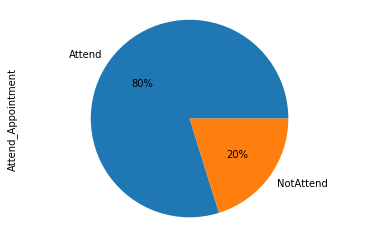

In [101]:
 df_clean["Attend_Appointment"].value_counts().plot(kind="pie",autopct="%.0f%%",labels=["Attend","NotAttend"])#,shadow=True,radius=3,explode=[0,.2],fontsize=20)
#plt.title("TITLE: percentage of attend or not")
plt.axis("equal")

# <a id='conclusions'></a>
## Conclusions
After clean data i found: (1)female attend appointment more than male
                          (2)normal pepople attend more than diabies
                          (3)sending SMS TO patient donot effect
                          (4)the most number of patient that attend appointment in neighbourhood "ARDIM CAMBURI"

##limitations
For more clear data analysis want to look into more details like :
*The address of patient this help to determine if the distance from patient to medical centre make difference
> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [108]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0